Спесивцева Полина Эдуардовна БПМ223

Для работы использовать файл BANKLOAN_02.xlsx

1. Используя библиотеку scikit-learn, построить интерпретируемую модель вероятности дефолта, как функции всех количественных характеристик клиента. Получить таблицу результатов оценивания.
2. Выбрать пороговый уровень вероятности дефолта и построить классификатор. Оценить качество классификации на основе таблицы сопряженности и доли верных классификаций на тестовом множестве.
3. Сформировать таблицу "Ожидание-Предсказание" для тестового множества в pandas.DataFrame и оценить качество классификатора на ее основе. Вывести таблицу (сlassification_report) в текстовый отчет
4. Рассчитать силу влияния факторов на вероятность дефолта для каждого клиента.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import statsmodels.api as sm

# Загрузка данных
file_path = 'BANKLOAN_02.xlsx'
data = pd.read_excel(file_path)

# Разделение на признаки (X) и целевую переменную (y)
X = data[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]
y = data['default']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Оценка вероятностей дефолта
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Вывод коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

# Установка порога вероятности дефолта
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

# Таблица сопряженности
conf_matrix = confusion_matrix(y_test, y_pred)
print("Таблица сопряженности:")
print(conf_matrix)

# Доля верных классификаций
accuracy = accuracy_score(y_test, y_pred)
print(f"Доля верных классификаций: {accuracy:.2f}")

# Создание таблицы "Ожидание-Предсказание"
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_pred_prob
})
print(results.head())

# Вывод отчета о классификации
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
with open('classification_report.txt', 'w') as f:
    f.write(report_df.to_string())
print("Отчет о классификации сохранен в classification_report.txt")

# Расчет силы влияния факторов
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

X_test_sm = sm.add_constant(X_test)
influence_strength = X_test_sm * result.params.values
influence_strength['Total_Influence'] = influence_strength.sum(axis=1)
print(influence_strength.head())

    Feature  Coefficient
0       age     0.039230
1        ed     0.023848
2    employ    -0.259274
3   address    -0.084947
4    income    -0.006776
5   debtinc     0.050530
6  creddebt     0.578858
7   othdebt     0.081557
Таблица сопряженности:
[[151  10]
 [ 18  31]]
Доля верных классификаций: 0.87
     Actual  Predicted  Probability
158       1          0     0.202640
500       0          0     0.488666
396       0          0     0.055125
155       0          0     0.279844
321       1          0     0.331821
Отчет о классификации сохранен в classification_report.txt
Optimization terminated successfully.
         Current function value: 0.421585
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date

**1. Коэффициенты модели**

Коэффициенты логистической регрессии показывают, как каждый фактор влияет на вероятность дефолта. Положительные коэффициенты увеличивают вероятность дефолта, а отрицательные — уменьшают.

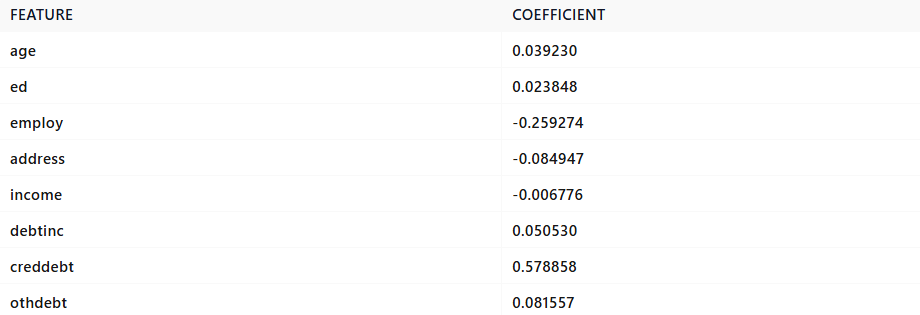

**Интерпретация:**

* creddebt (кредитный долг) : Наиболее значимый фактор, положительно влияющий на вероятность дефолта.
* employ (стаж работы) : Отрицательное влияние — чем больше стаж, тем ниже вероятность дефолта.
* address (время проживания по текущему адресу) : Отрицательное влияние — более длительное проживание снижает риск дефолта.
* income (доход) : Незначительное отрицательное влияние на вероятность дефолта.

**2. Таблица сопряженности**

Таблица сопряженности показывает, как модель классифицирует клиентов:

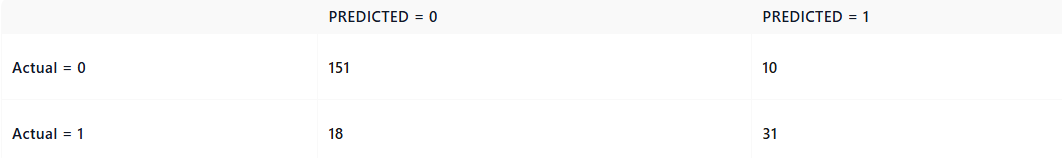

**Интерпретация:**

* True Negative (TN) : 151 клиент правильно классифицирован как "не дефолт".
* False Positive (FP) : 10 клиентов ошибочно классифицированы как "дефолт".
* False Negative (FN) : 18 клиентов ошибочно классифицированы как "не дефолт".
* True Positive (TP) : 31 клиент правильно классифицирован как "дефолт".

**Доля верных классификаций :**

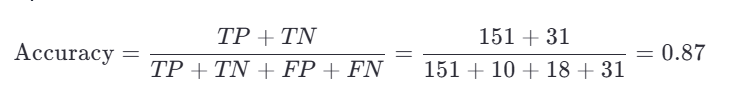

**3. Отчет о классификации**

Отчет сохранен в файл classification_report.txt.

Основные метрики:

* Precision (точность) : Какая доля предсказанных положительных классов действительно положительна.
* Recall (полнота) : Какая доля фактических положительных классов была правильно предсказана.
* F1-score : Гармоническое среднее между точностью и полнотой.
Пример интерпретации:

Если **precision** для класса "дефолт" **высокая**, это означает, что модель редко ошибается, предсказывая дефолт.

Если **recall** для класса "дефолт" **низкая**, это означает, что модель пропускает много реальных случаев дефолта.

**4. Сила влияния факторов**

Сила влияния факторов рассчитывается для каждого клиента. Она показывает, какой вклад каждый фактор вносит в вероятность дефолта для конкретного клиента.

Пример для первого клиента (строка 158):

* Влияние возраста (age) : 1.300775
* Влияние кредитного долга (creddebt) : 0.795178
* Общее влияние (Total_Influence) : −1.377428

**Интерпретация:**

* Положительные значения увеличивают вероятность дефолта.
* Отрицательные значения снижают вероятность дефолта.
* Для клиента 158 общее влияние факторов (−1.377) указывает на низкую вероятность дефолта.